# 1. Import Libraries and Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import plotly.express as px

In [2]:
df = pd.read_csv('/kaggle/input/data-science-jobs-and-salary-glassdoor/Glassdoor_Salary_Cleaned_Version.csv')

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          742 non-null    object 
 1   Salary Estimate    742 non-null    object 
 2   Job Description    742 non-null    object 
 3   Rating             742 non-null    float64
 4   Company Name       742 non-null    object 
 5   Location           742 non-null    object 
 6   Headquarters       742 non-null    object 
 7   Size               742 non-null    object 
 8   Founded            742 non-null    int64  
 9   Type of ownership  742 non-null    object 
 10  Industry           742 non-null    object 
 11  Sector             742 non-null    object 
 12  Revenue            742 non-null    object 
 13  Competitors        742 non-null    object 
 14  hourly             742 non-null    int64  
 15  employer_provided  742 non-null    int64  
 16  min_salary         742 non

In [4]:
print(df.describe())

           Rating      Founded      hourly  employer_provided  min_salary  \
count  742.000000   742.000000  742.000000         742.000000  742.000000   
mean     3.618868  1837.154987    0.032345           0.022911   74.068733   
std      0.801210   497.183763    0.177034           0.149721   31.869282   
min     -1.000000    -1.000000    0.000000           0.000000   10.000000   
25%      3.300000  1939.000000    0.000000           0.000000   52.000000   
50%      3.700000  1988.000000    0.000000           0.000000   69.500000   
75%      4.000000  2007.000000    0.000000           0.000000   91.000000   
max      5.000000  2019.000000    1.000000           1.000000  202.000000   

       max_salary  avg_salary  same_state         age   python_yn        R_yn  \
count  742.000000  742.000000  742.000000  742.000000  742.000000  742.000000   
mean   127.183288  100.626011    0.557951   46.591644    0.528302    0.002695   
std     46.909006   38.855948    0.496965   53.778815    0.4995

In [5]:
print(df.isnull().sum()) # Check for missing values
df.dropna(inplace=True)
df['Salary Estimate'] = df['Salary Estimate'].str.replace('[\$,]', '', regex=True)
df['Salary Estimate'] = df['Salary Estimate'].str.extract('(\d+)').astype(float)

Job Title            0
Salary Estimate      0
Job Description      0
Rating               0
Company Name         0
Location             0
Headquarters         0
Size                 0
Founded              0
Type of ownership    0
Industry             0
Sector               0
Revenue              0
Competitors          0
hourly               0
employer_provided    0
min_salary           0
max_salary           0
avg_salary           0
company_txt          0
job_state            0
same_state           0
age                  0
python_yn            0
R_yn                 0
spark                0
aws                  0
excel                0
dtype: int64


# 2. Exploratory Data Analysis

In this EDA work, I have covered the following visualizations:
1. Univariate Analysis
2. Bivariate Analysis
3. Multivariate Analysis
4. Geographical Analysis
5. Time-Series Analysis
6. Company-Specific Analysis

Here is the detailed analysis and visualizations for each of these aspects:

## 2.1. Univariate Analysis
It involves looking at one variable at a time to understand its distribution and characteristics. For example, analyzing the distribution of salaries in a dataset. 

### 2.1.1. Distribution of Numerical Variables
In this section, each variable is examined individually to understand its distribution and characteristics. The exploration will begin with numerical variables such as Rating, Founded and Salary Estimate.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


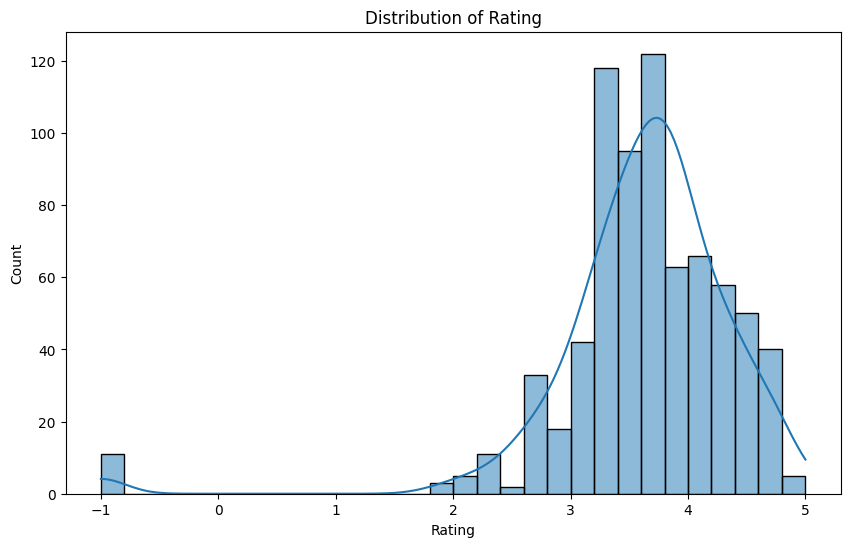

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


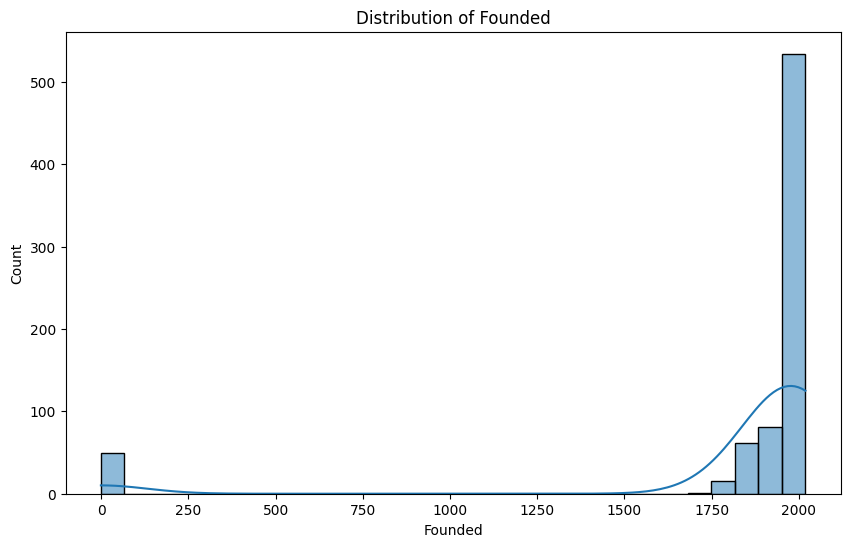

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


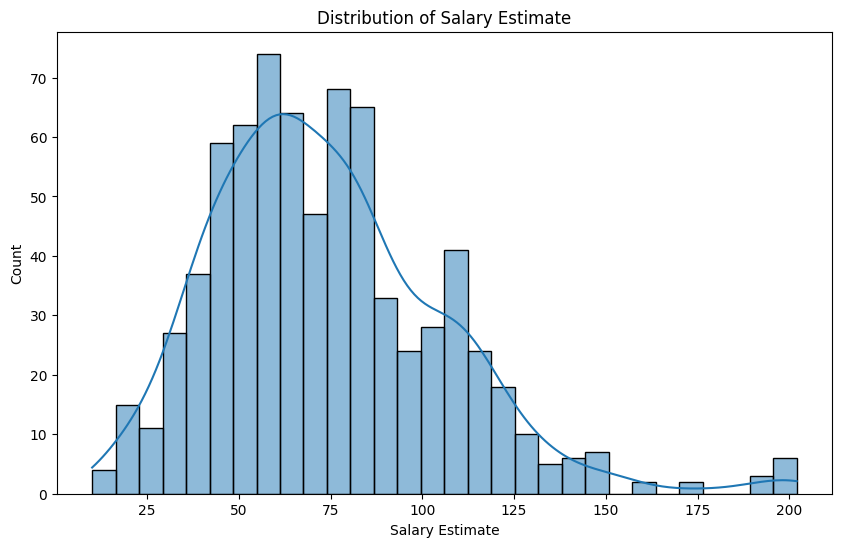

In [6]:
numerical_columns = ['Rating', 'Founded', 'Salary Estimate']
for col in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()

### 2.1.2. Count Plots for Top 20 Categorical Variables

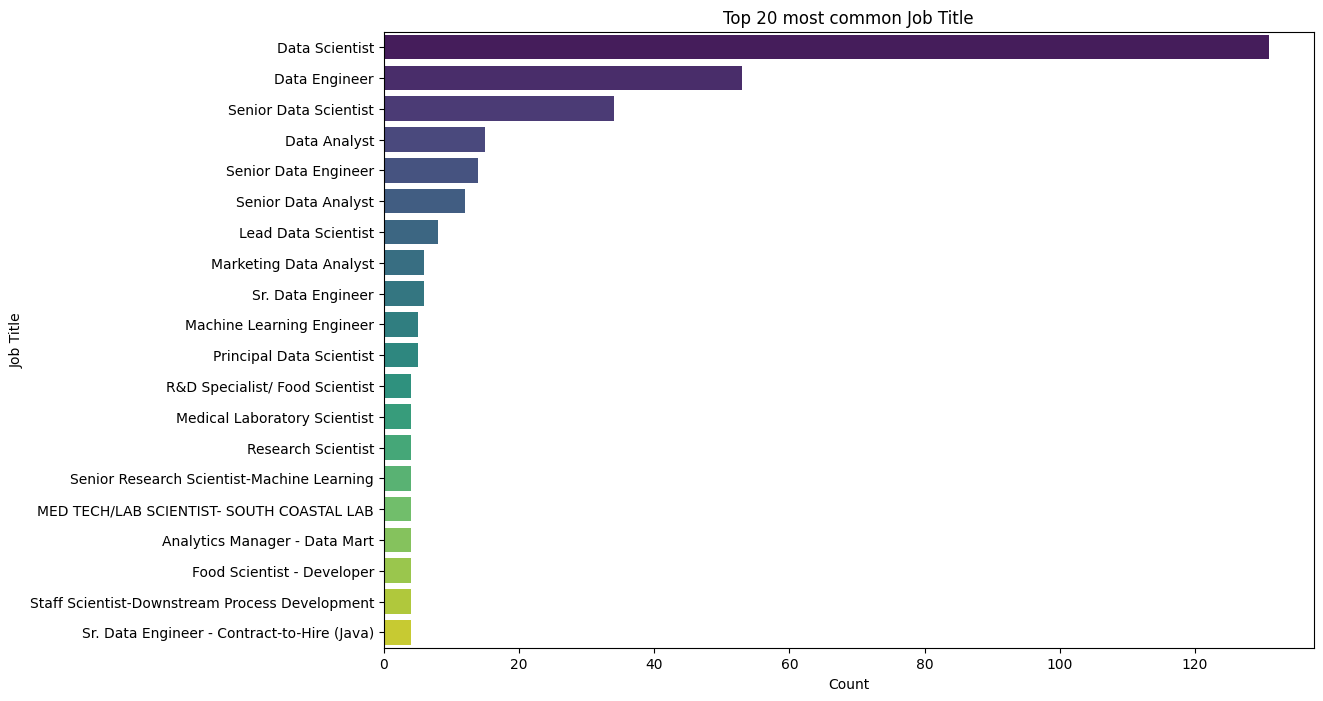

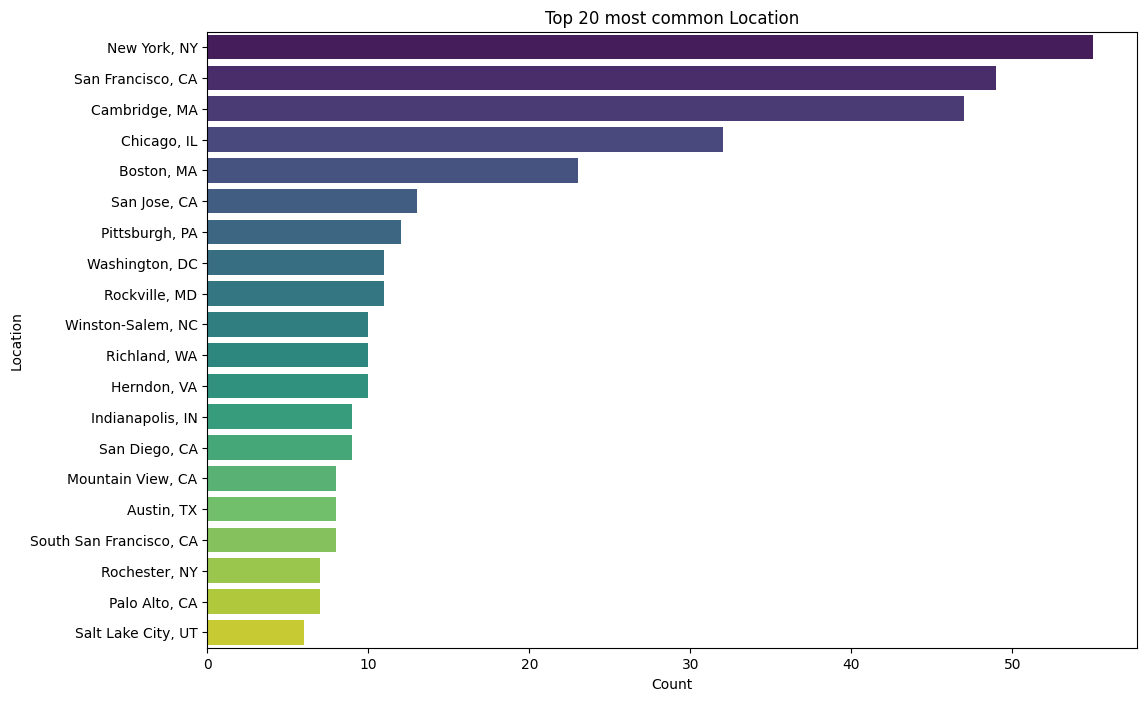

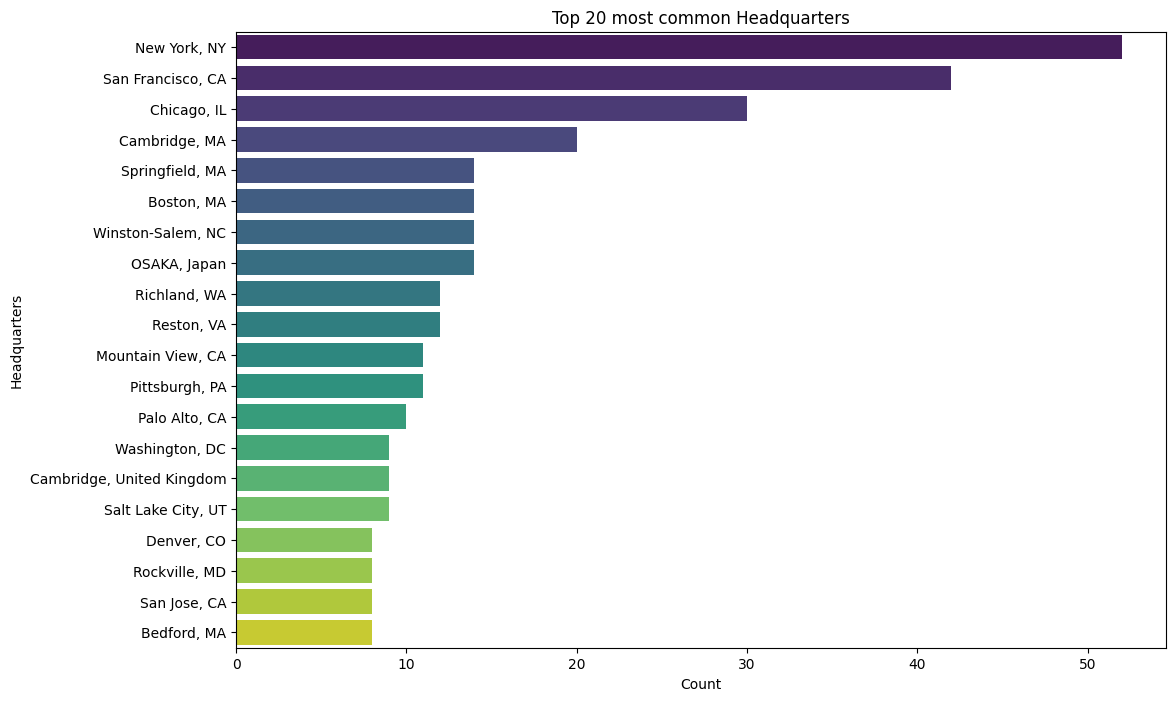

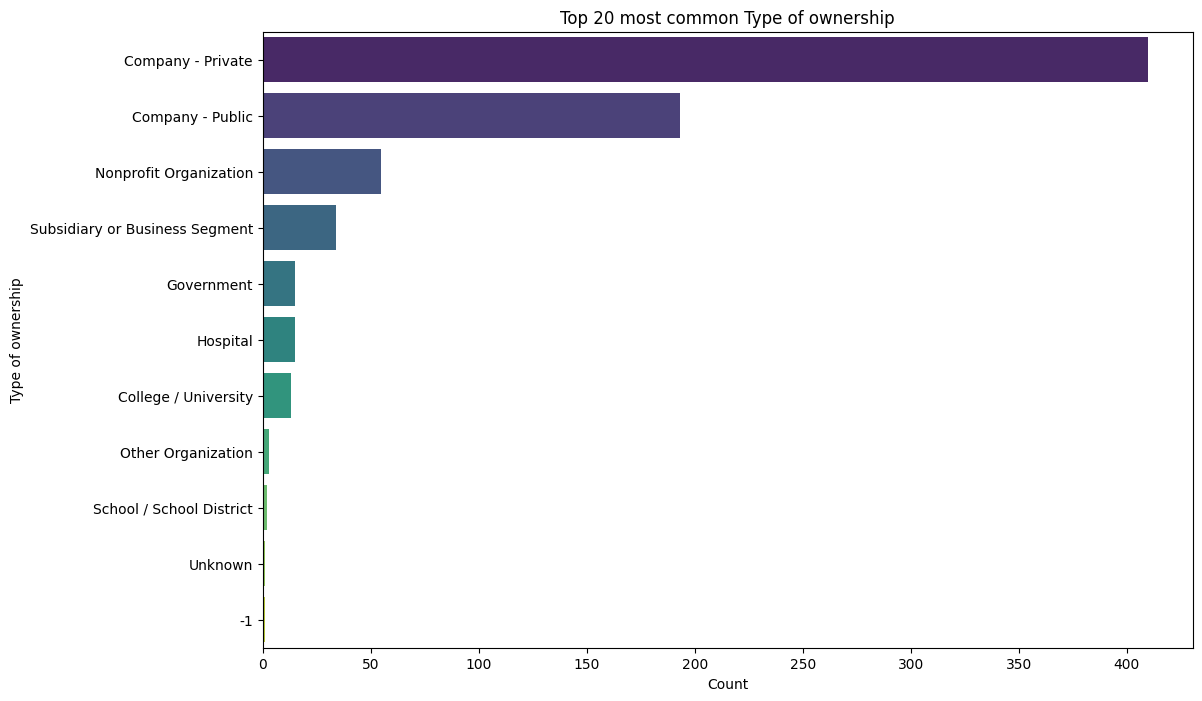

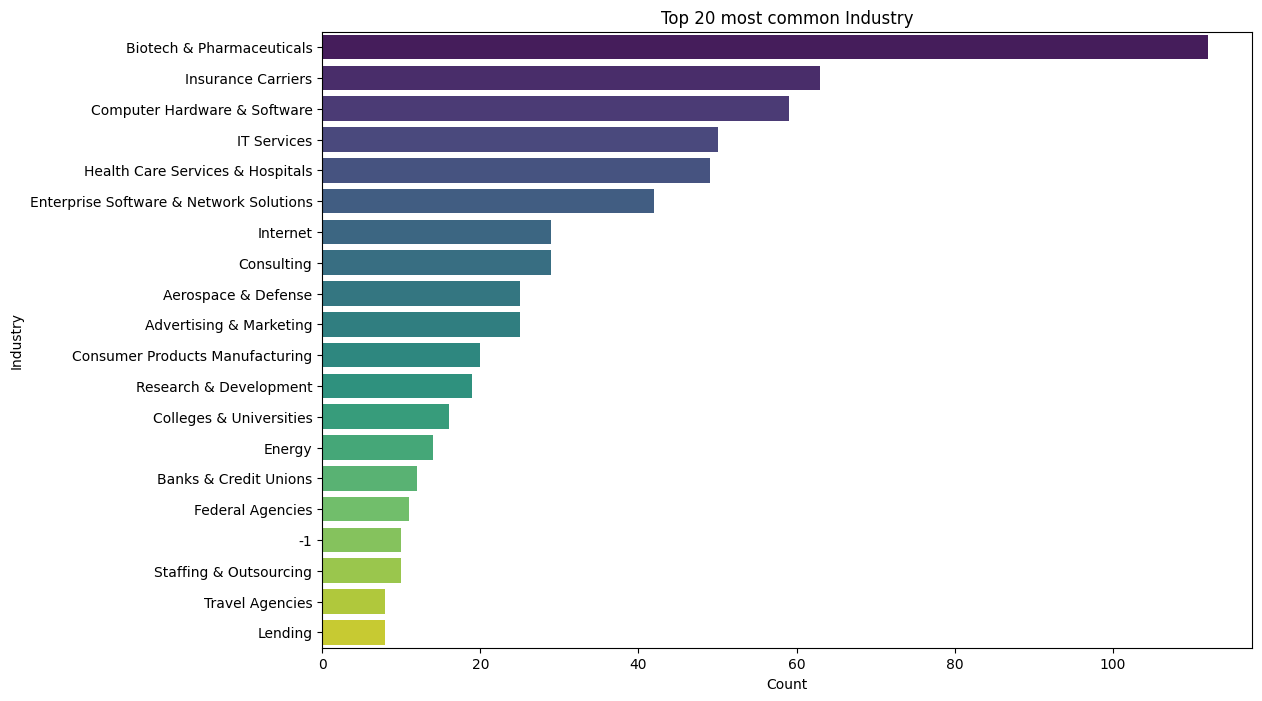

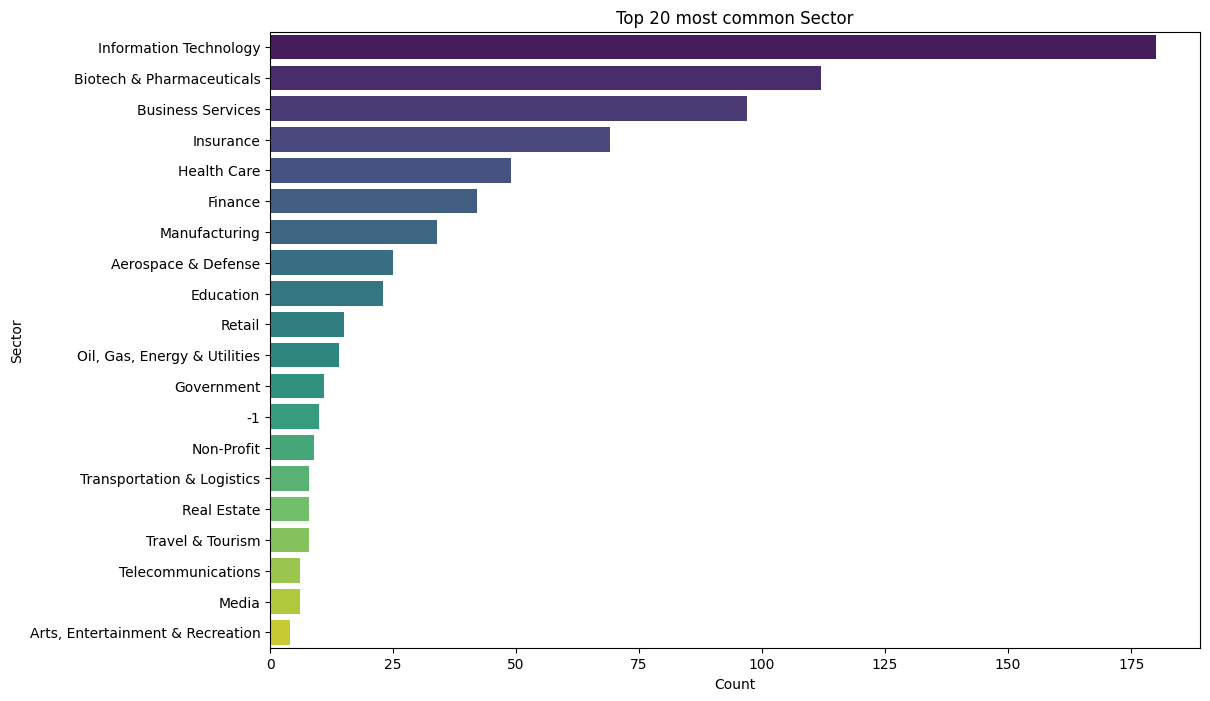

In [7]:
def plot_top_n_categories(df, column, n=20):
    top_n = df[column].value_counts().nlargest(n)
    plt.figure(figsize=(12, 8))
    sns.barplot(y=top_n.index, x=top_n.values, palette='viridis')
    plt.title(f'Top {n} most common {column}')
    plt.ylabel(column)
    plt.xlabel('Count')
    plt.gca().set_yticklabels(top_n.index, rotation=0, ha='right')
    plt.show()

categorical_columns = ['Job Title', 'Location', 'Headquarters', 'Type of ownership', 'Industry', 'Sector']
for col in categorical_columns:
    plot_top_n_categories(df, col, n=20)

### 2.1.3. WordCloud for High-Level View of Most Common Categories

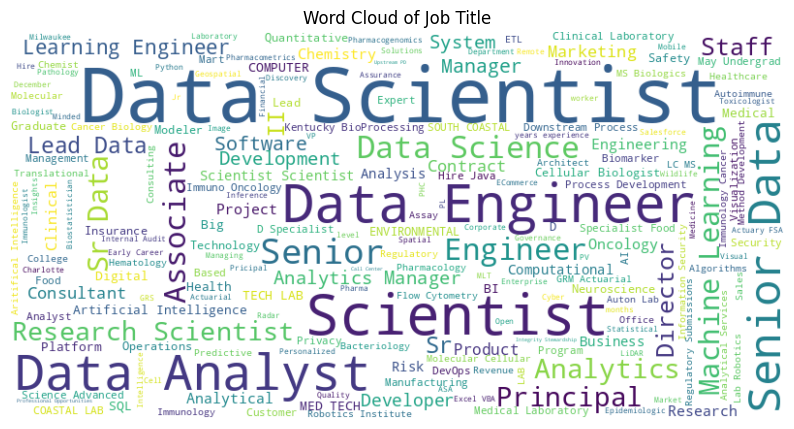

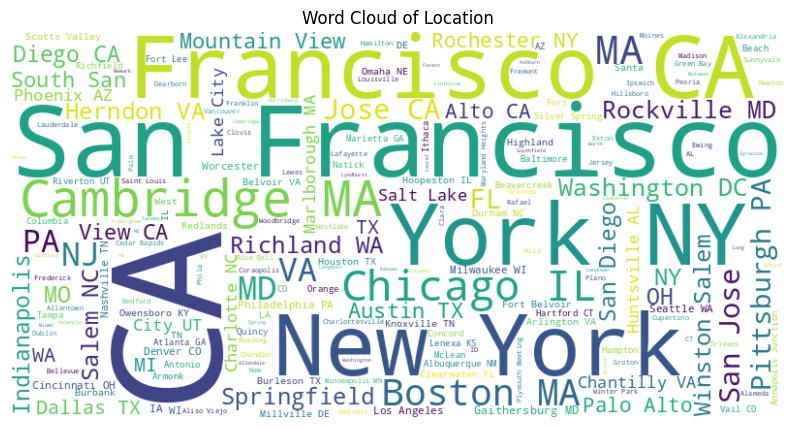

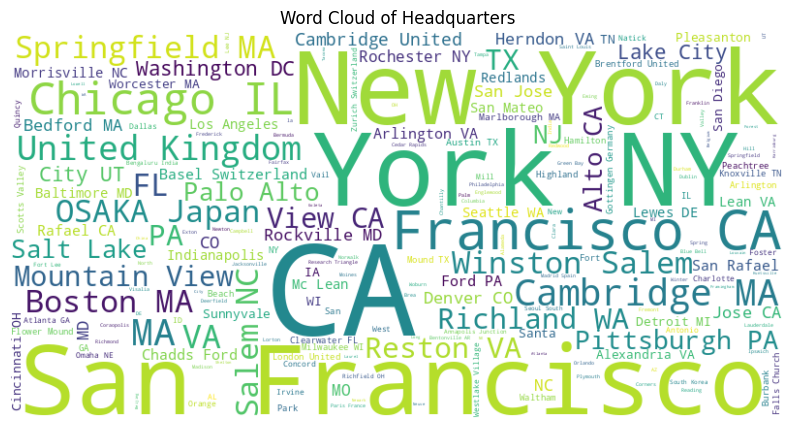

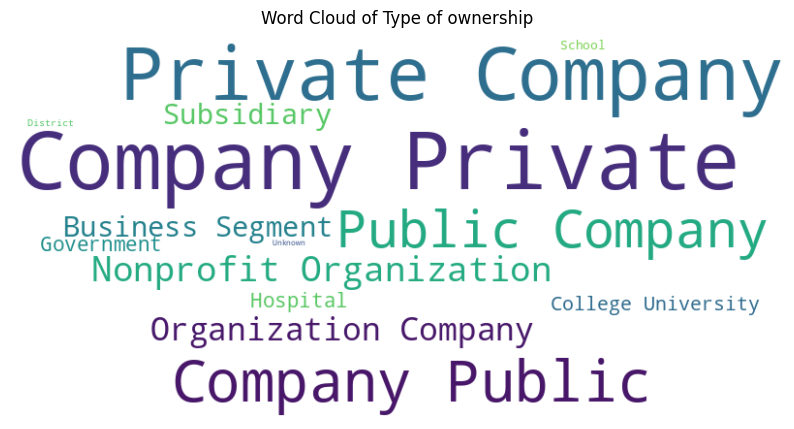

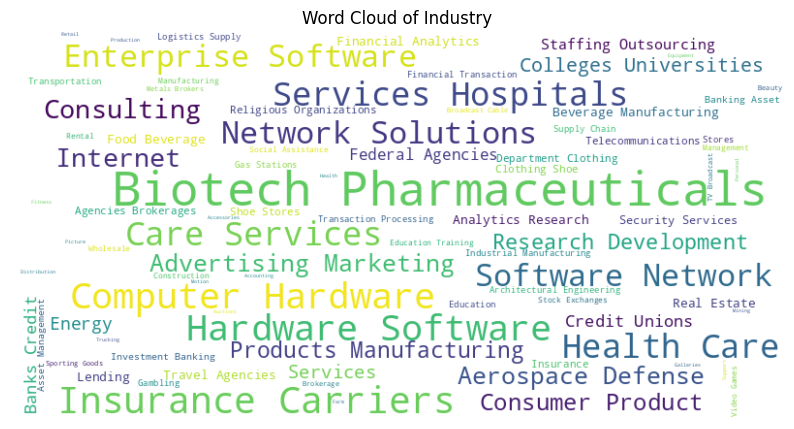

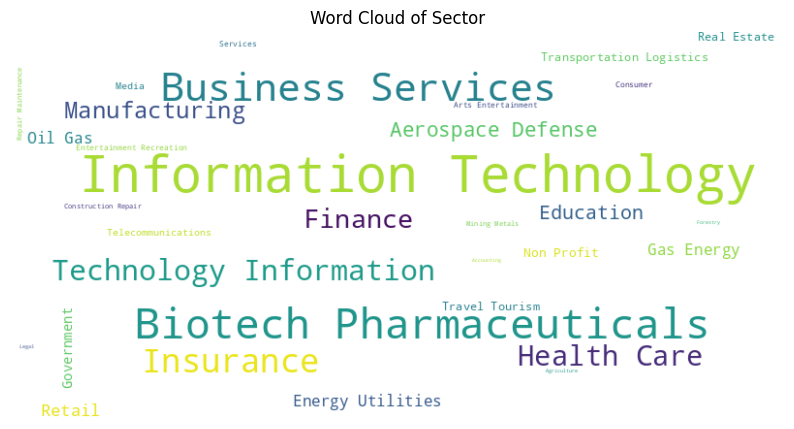

In [8]:
def plot_wordcloud(df, column):
    text = ' '.join(df[column].astype(str).values)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud of {column}')
    plt.show()

for col in categorical_columns:
    plot_wordcloud(df, col)

## 2.2. Bivariate Analysis
It examines the relationship between two variables to understand how they are related or influence each other. For example, studying the correlation between years of experience and salary.

### 2.2.1. Box Plots for Salary Estimate by Top 20 Categorical Variables


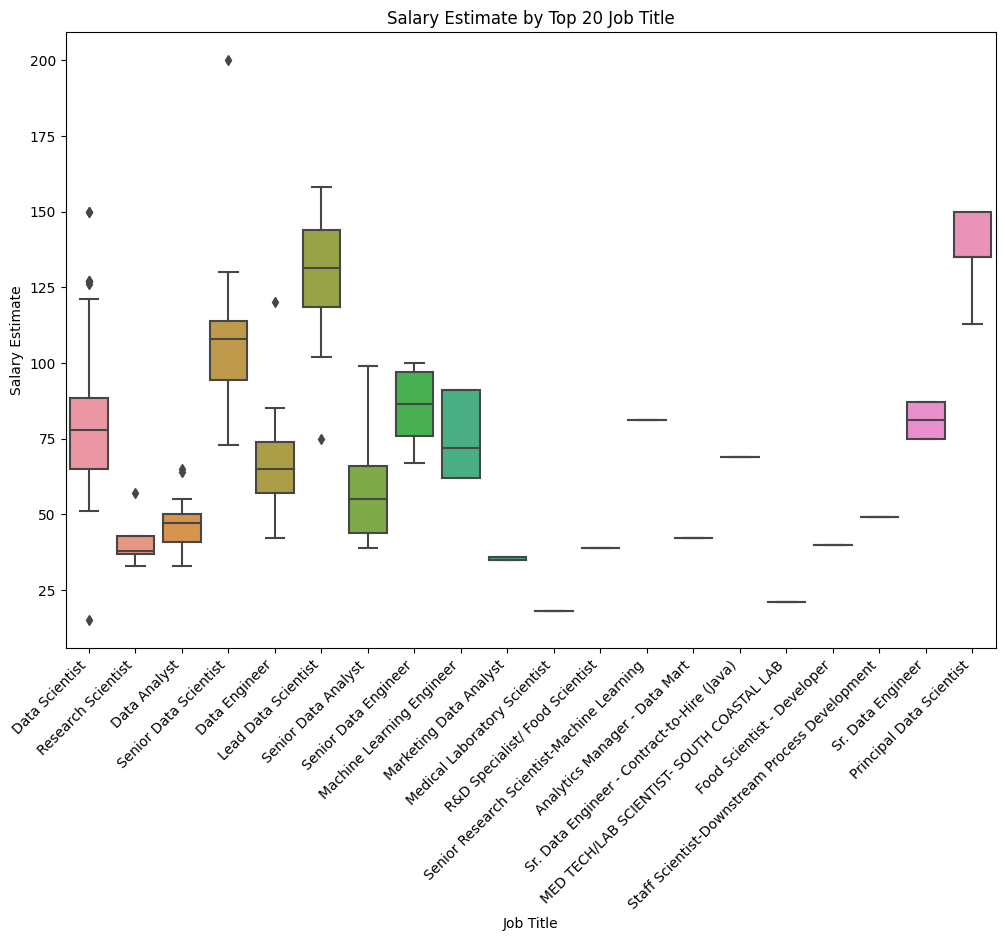

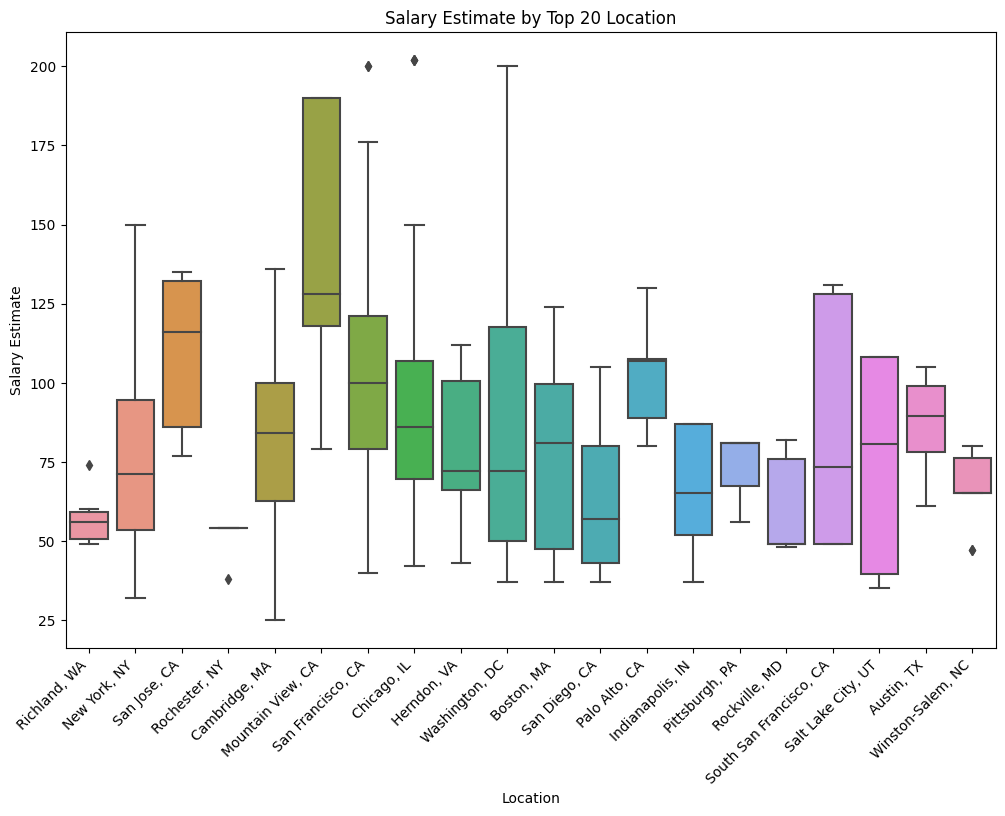

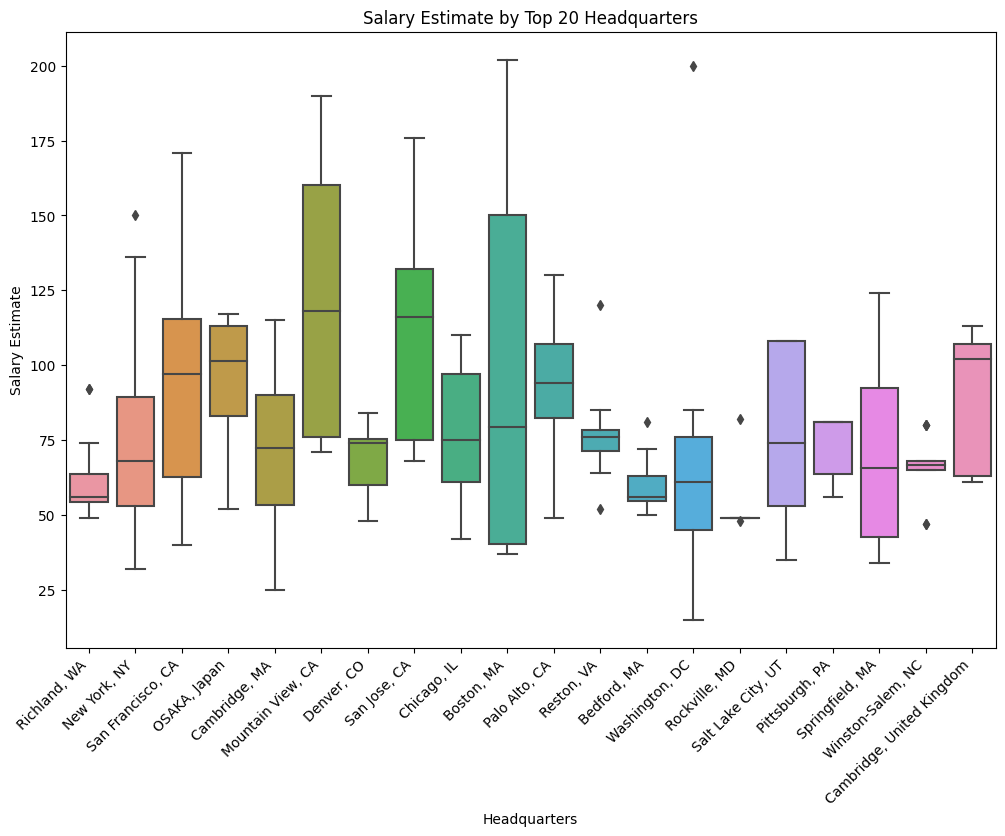

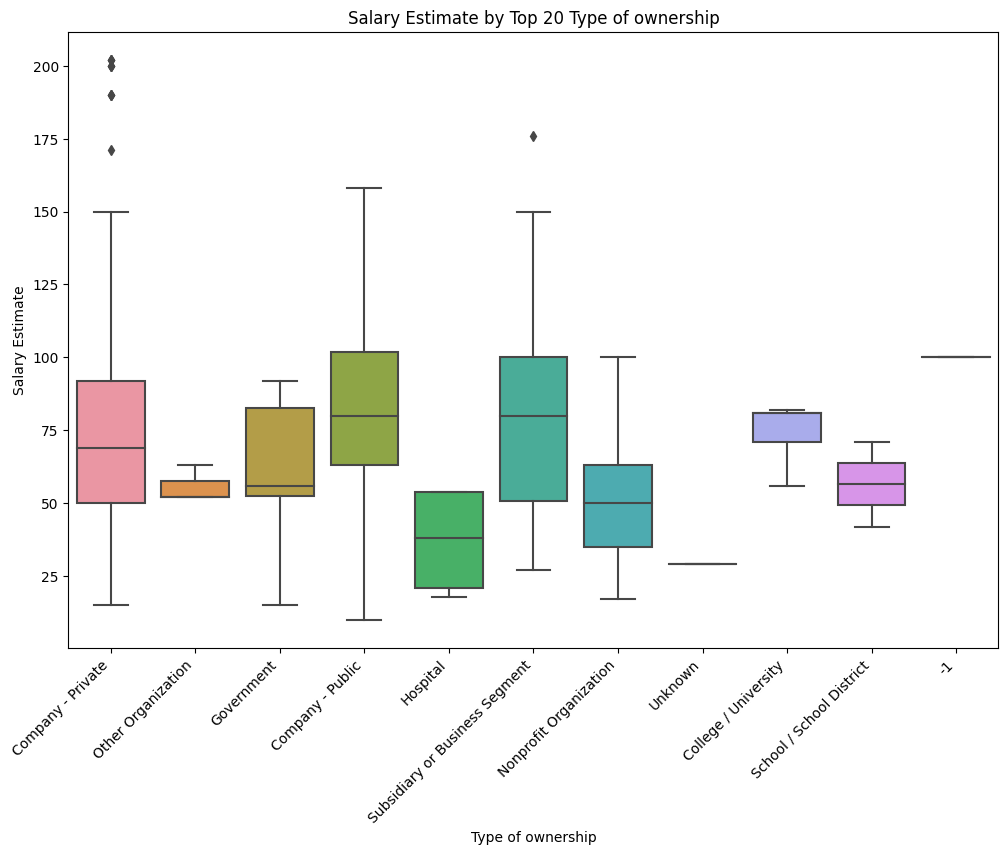

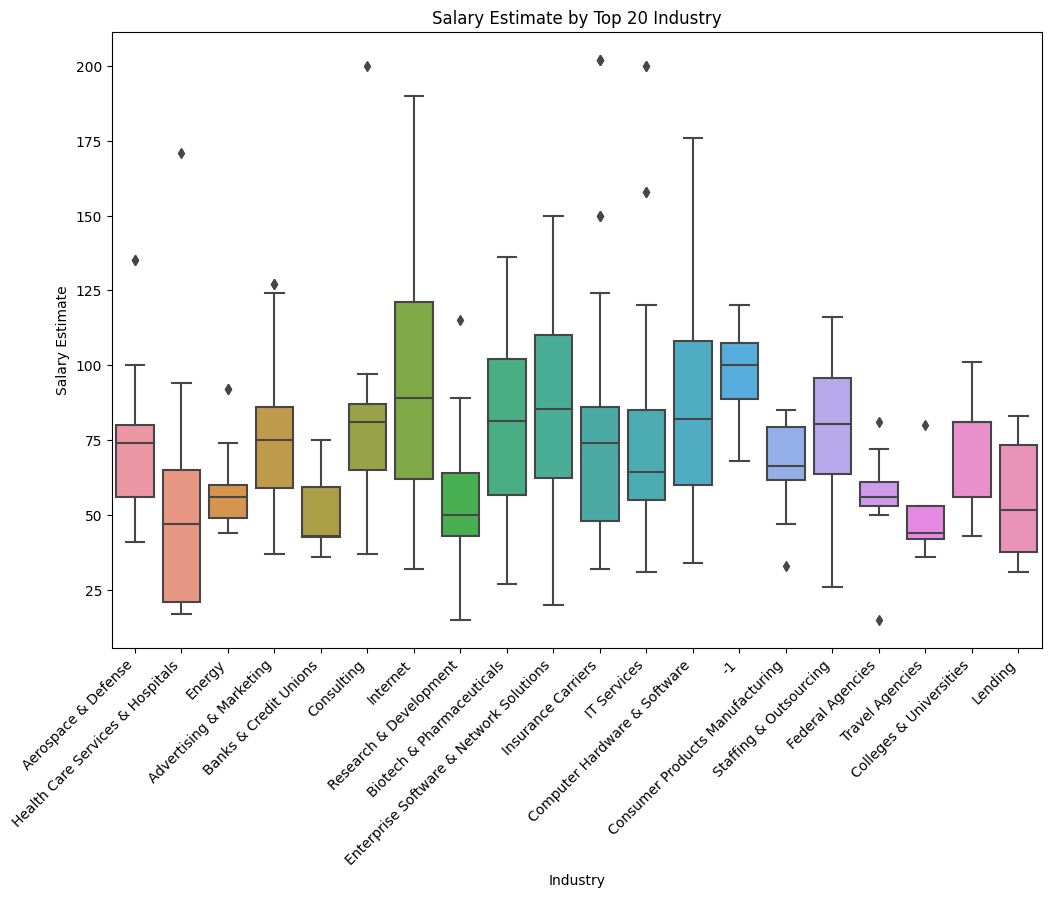

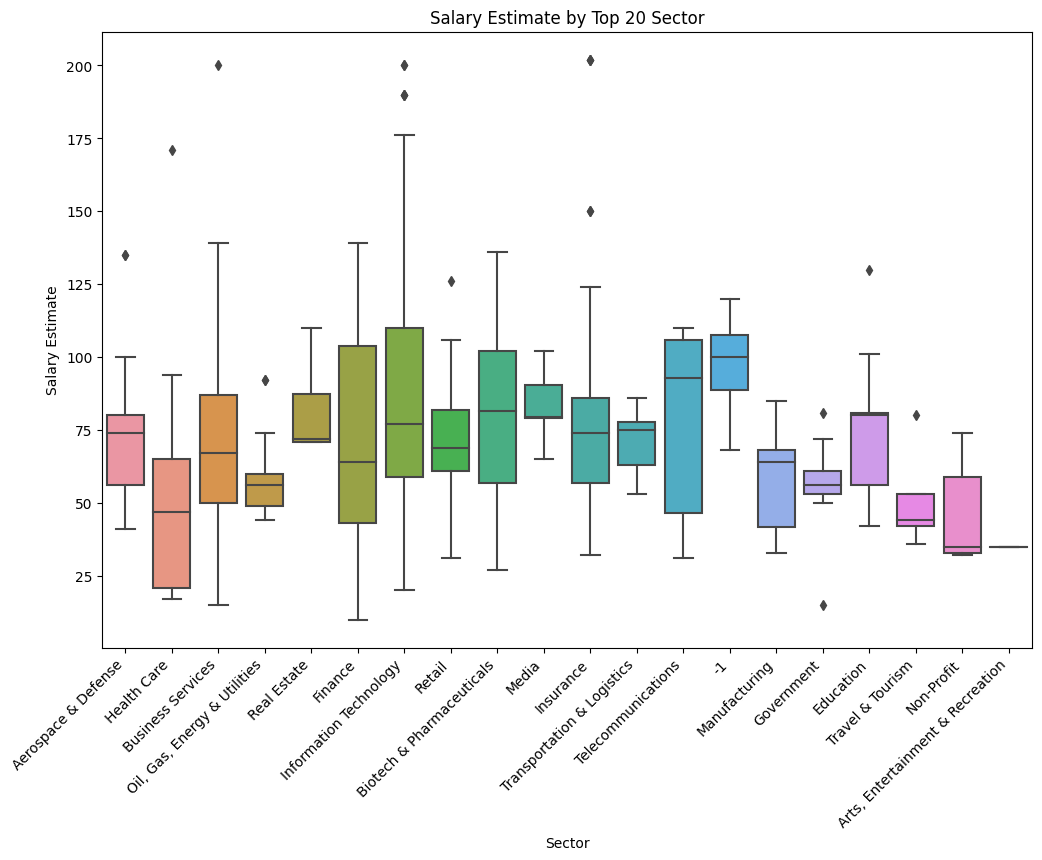

In [9]:
def plot_boxplot_top_n(df, column, target, n=20):
    top_n = df[column].value_counts().nlargest(n).index
    df_top_n = df[df[column].isin(top_n)]
    plt.figure(figsize=(12, 8))
    sns.boxplot(x=df_top_n[column], y=df_top_n[target])
    plt.title(f'{target} by Top {n} {column}')
    plt.xticks(rotation=45, ha='right')
    plt.show()

for col in categorical_columns:
    plot_boxplot_top_n(df, col, 'Salary Estimate', n=20)

### 2.2.2. Scatter Plots for Numerical Variables
In this section, the focus is on analyzing the relationship between numerical variables and salary estimates. This involves studying how different quantitative factors correlate with salary predictions.

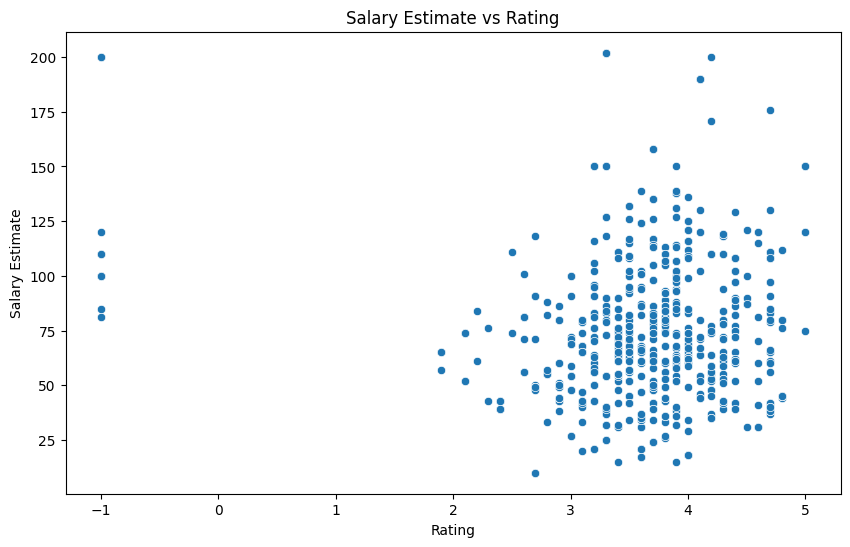

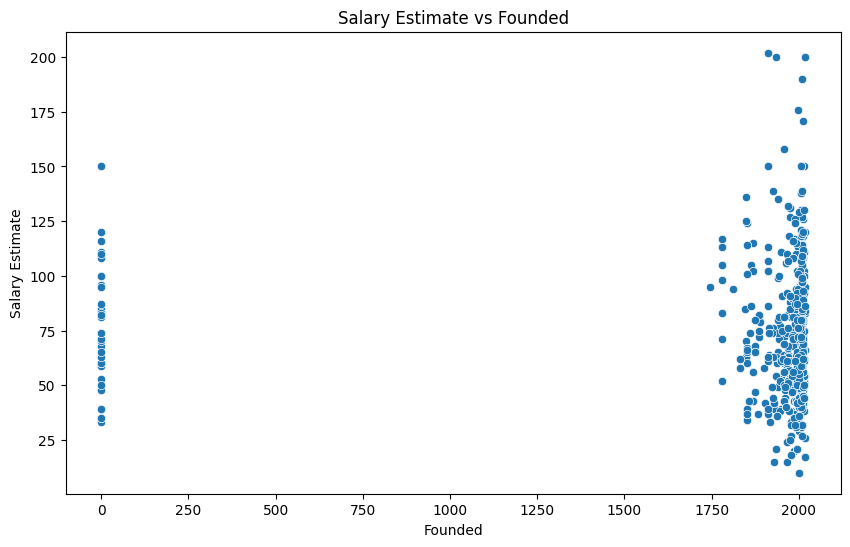

In [10]:
for col in numerical_columns:
    if col != 'Salary Estimate':
        plt.figure(figsize=(10, 6))
        sns.scatterplot(x=df[col], y=df['Salary Estimate'])
        plt.title(f'Salary Estimate vs {col}')
        plt.show()


## 2.3. Multivariate Analysis
It examines the relationship between three or more variables simultaneously to uncover complex patterns and interactions among them. It enables deeper insights into the relationships between multiple factors.

### 2.3.1. Pair Plots for Numerical Variables
In this section, pair plots are used to visualize the relationships between numerical variables.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


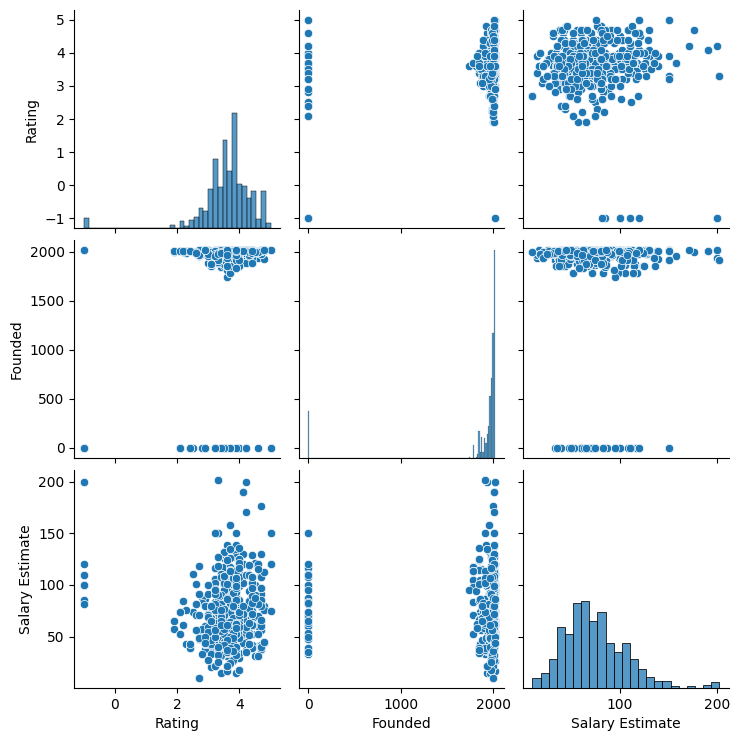

In [11]:
sns.pairplot(df[numerical_columns])
plt.show()

### 2.3.2. Heatmap for Correlation Matrix
In this section, a heatmap is utilized to visualize the correlation matrix of numerical variables.

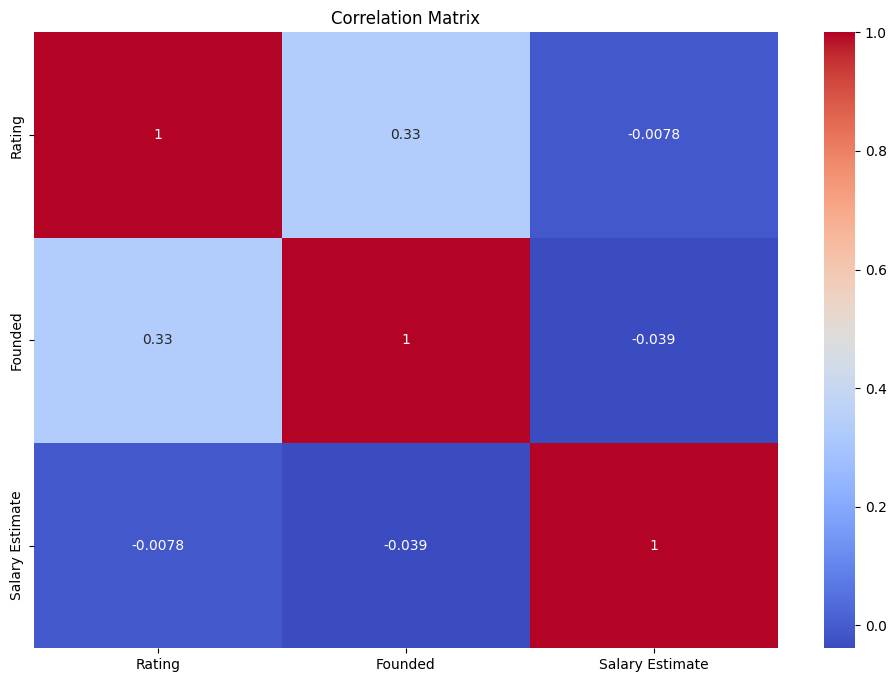

In [12]:
plt.figure(figsize=(12, 8))
sns.heatmap(df[numerical_columns].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## 2.4. Geographical Analysis
It focuses on understanding patterns and trends related to location-based data. It involves mapping and visualizing data to uncover spatial relationships and geographical trends.

### 2.4.1. Bar Plots for Top Job Locations and Company Headquarters
In this section, the focus is on visualizing the top job locations and company headquarters.

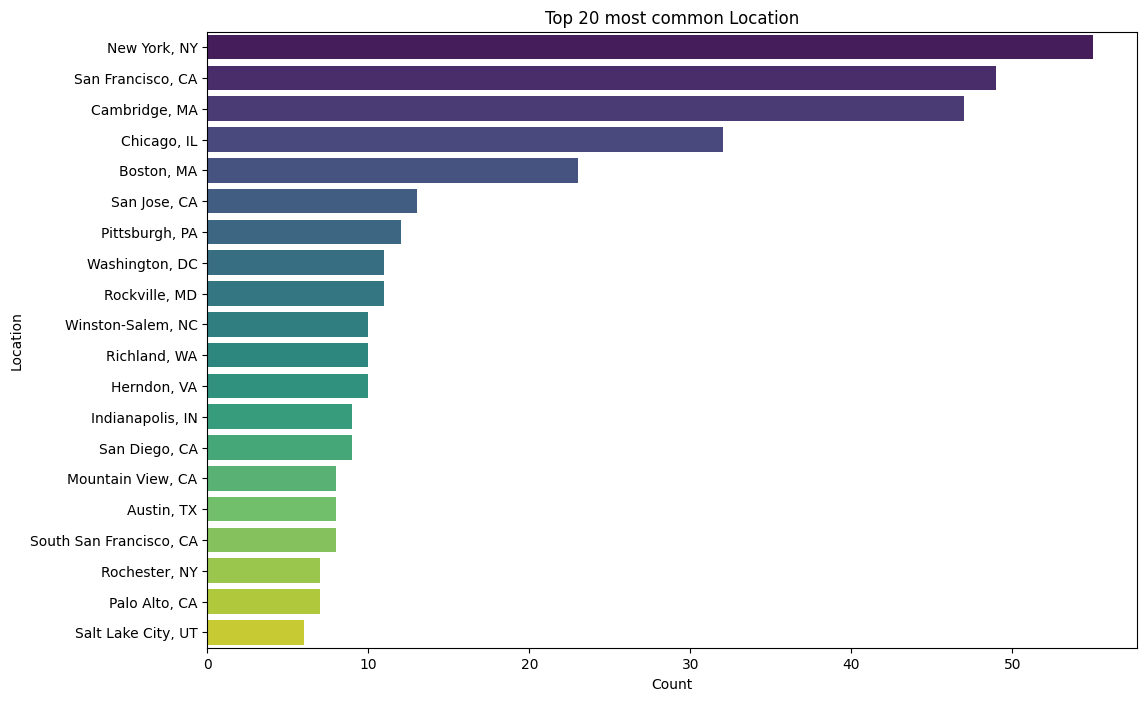

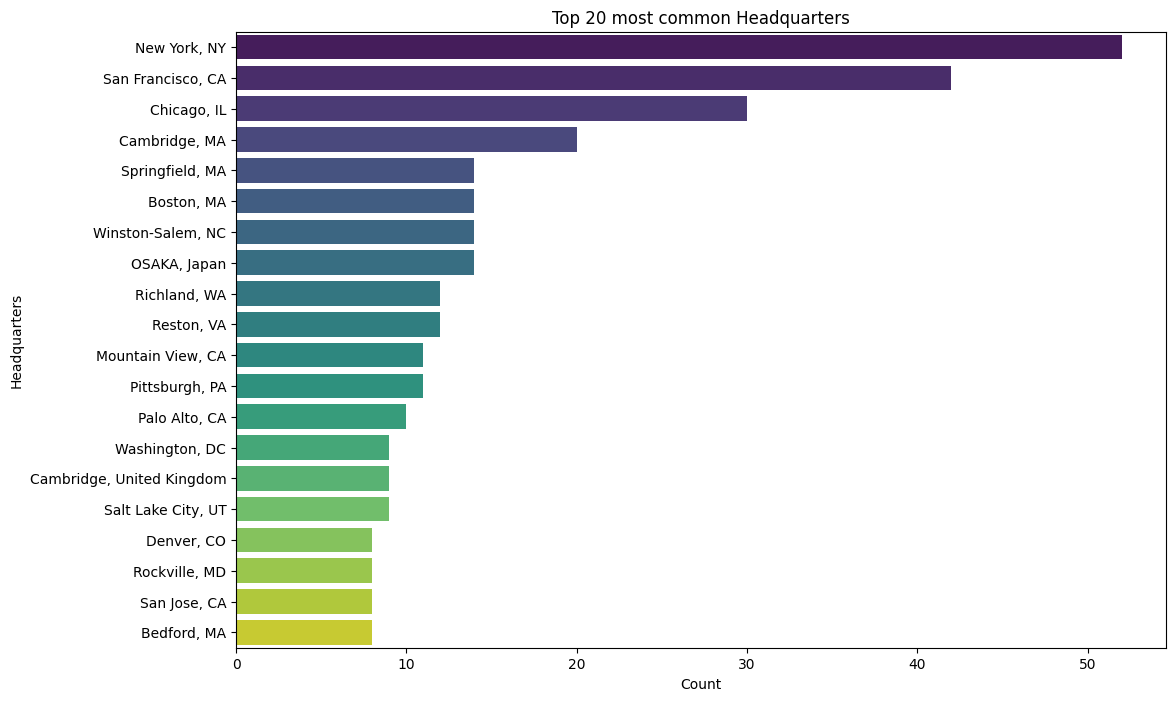

In [13]:
plot_top_n_categories(df, 'Location', n=20)
plot_top_n_categories(df, 'Headquarters', n=20)

## 2.5. Time-Series Analysis
It examines data collected over regular intervals of time to identify patterns, trends and seasonal variations. It helps in understanding how variables change over time and making forecasts.

### 2.5.1. Line Plot for Year Founded 
In this section, the focus is on examining the distribution of company founding years.

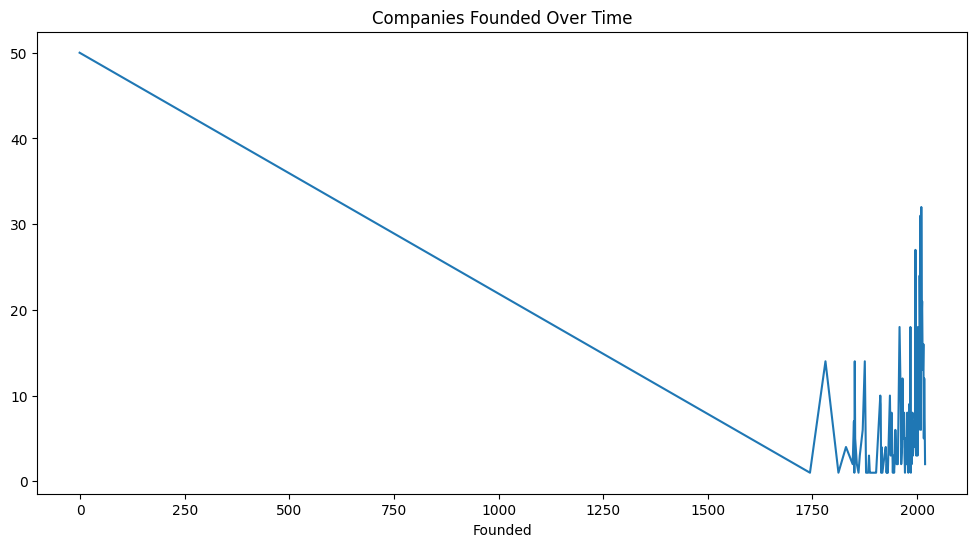

In [14]:
df['Founded'] = df['Founded'].astype(int)
founded_counts = df['Founded'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
founded_counts.plot(kind='line')
plt.title('Companies Founded Over Time')
plt.show()

## 2.6. Company-Specific Analysis
This type of analysis focuses on exploring data specific to individual companies such as ratings, size, financial performance and market position. It provides insights into the unique characteristics and performance of each company.

### 2.6.1. Bar Plots and Pie Charts for Company Ratings, Size and Type of Ownership 
In this section, the analysis focuses on company ratings, size and type of ownership.

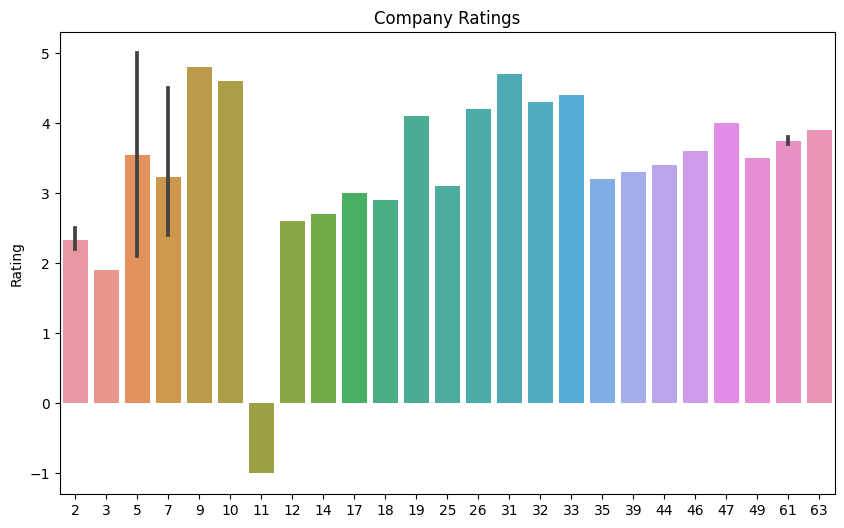

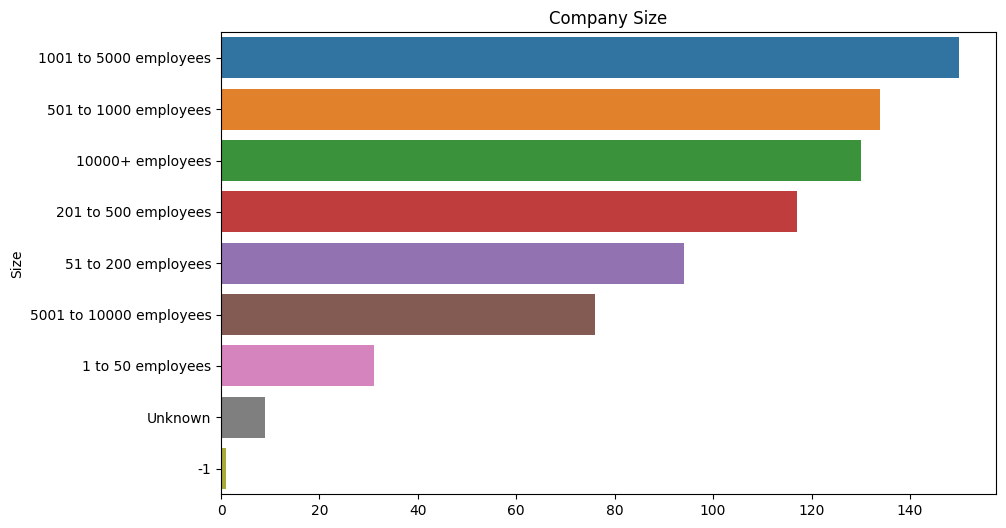

In [15]:
rating_counts = df['Rating'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(y=rating_counts.index, x=rating_counts.values)
plt.title('Company Ratings')
plt.show()

size_counts = df['Size'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(y=size_counts.index, x=size_counts.values)
plt.title('Company Size')
plt.show()